# Importing Liabraries


In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Importing csv File


In [99]:
df = pd.read_csv("Bengaluru_House_Data.csv")


### Analysing the DataFrame


In [100]:
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [101]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [102]:
df.shape


(13320, 9)

In [103]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


### Data Cleaning

In [104]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

### Society as large number of null values.


In [105]:
df = df.drop(["society"], axis = 1)

In [106]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


#### Large number of rows in balcony have null values. They can be filled with mode of balcony column.

In [107]:
df['balcony'].fillna(df['balcony'].mode(), inplace=True)

In [108]:
df.dropna(axis = 0, inplace = True)

In [109]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

### Data Manipulation

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  object 
 1   availability  12710 non-null  object 
 2   location      12710 non-null  object 
 3   size          12710 non-null  object 
 4   total_sqft    12710 non-null  object 
 5   bath          12710 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         12710 non-null  float64
dtypes: float64(3), object(5)
memory usage: 893.7+ KB


In [111]:
df.nunique()

area_type          4
availability      78
location        1265
size              27
total_sqft      1976
bath              16
balcony            4
price           1924
dtype: int64

In [112]:
df["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [113]:

df["availability"].unique()


array(['19-Dec', 'Ready To Move', '18-Feb', '18-Nov', '18-May', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '18-Apr',
       '20-Aug', '19-Mar', '17-Sep', '18-Dec', '17-Aug', '19-Apr',
       '18-Jun', '22-Dec', '22-Jan', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '21-Jun', '20-May', '19-Aug', '18-Sep', '17-May',
       '17-Jun', '18-Oct', '21-May', '18-Jan', '20-Mar', '17-Dec',
       '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb', '19-May',
       '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct', '21-Jan',
       '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov',
       '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep', '21-Aug',
       '14-Nov', '19-Nov', '16-Jul', '15-Jun', '20-Nov', '20-Jul',
       '16-Sep', '20-Feb', '15-Dec', '16-Oct', '22-Nov', '15-Aug',
       '17-Jan', '16-Nov', '20-Apr', '16-Jan', '17-Feb', '14-Jul'],
      dtype=object)

#### Availability doesn't seems to be an important feature. Thus, it can dropped from original DataFrame.


In [114]:
df = df.drop(["availability"], axis = 1)


In [115]:
df["location"].unique()


array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [116]:
df["size"].unique()


array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

#### BHK and Bedroom indicate same feature. Bedroom can be replaced with BHK.


In [117]:
df["size"] = df["size"].str.replace("Bedroom", "BHK")


In [118]:
df["size"].unique()


array(['2 BHK', '4 BHK', '3 BHK', '1 BHK', '1 RK', '6 BHK', '8 BHK',
       '7 BHK', '5 BHK', '11 BHK', '9 BHK', '27 BHK', '43 BHK', '14 BHK',
       '12 BHK', '10 BHK', '13 BHK'], dtype=object)

In [119]:
df["total_sqft"].unique()


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

#### Some data exists in form of range of square feet, which can be replaced by mean of those numbers.

In [120]:
df["total_sqft"]= df["total_sqft"].astype(str)


In [121]:
def sqft(x):
    y = x.split("-")
    if len(y) == 2:
        return (float(y[0])+float(y[1]))/2
    elif len(y) == 1:
        return x
    else:
        return None

In [122]:
df["total_sqft"] = df["total_sqft"].apply(sqft)


In [123]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., 1258.5, '774', '4689'], dtype=object)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12710 non-null  object 
 1   location    12710 non-null  object 
 2   size        12710 non-null  object 
 3   total_sqft  12710 non-null  object 
 4   bath        12710 non-null  float64
 5   balcony     12710 non-null  float64
 6   price       12710 non-null  float64
dtypes: float64(3), object(4)
memory usage: 794.4+ KB


In [125]:
df["total_sqft"]= df["total_sqft"].str.replace("Sq. Meter", "")
df["total_sqft"]= df["total_sqft"].str.replace("Acres", "")
df["total_sqft"]= df["total_sqft"].str.replace("Sq. Yard", "")
df["total_sqft"]= df["total_sqft"].str.replace("s", "")
df["total_sqft"]= df["total_sqft"].str.replace("Cent", "")
df["total_sqft"]= df["total_sqft"].str.replace("Guntha", "")
df["total_sqft"]= df["total_sqft"].str.replace("Ground", "")

<ipython-input-125-4d4aae6b2ac3>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["total_sqft"]= df["total_sqft"].str.replace("Sq. Meter", "")
<ipython-input-125-4d4aae6b2ac3>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["total_sqft"]= df["total_sqft"].str.replace("Sq. Yard", "")


In [126]:
df["total_sqft"]= df["total_sqft"].astype(float)


In [127]:
df["bath"].unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  7.,  6.,  9., 27., 11., 12., 10.,
       40., 15., 13.])

In [128]:
df["balcony"].unique()


array([1., 3., 2., 0.])

#### Deriving new feature

In [129]:
df["price_per_sqft"] = df["price"]*100000/df["total_sqft"]
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4 BHK,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,4250.000000


In [130]:
df = df.reset_index(drop=True)


### Visualisation


In [131]:
df.head()


,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4 BHK,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,4250.000000


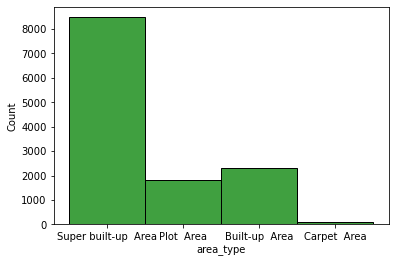

In [132]:
sns.histplot(df.area_type, color = "green")
plt.show()

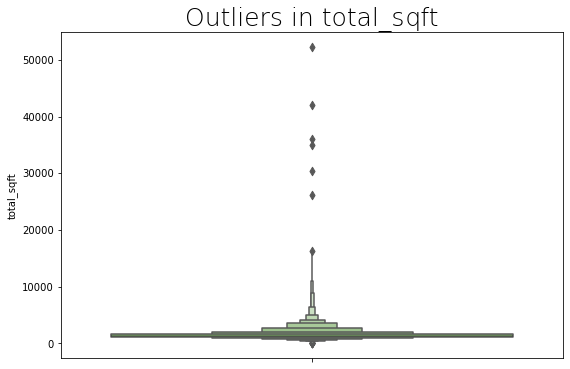

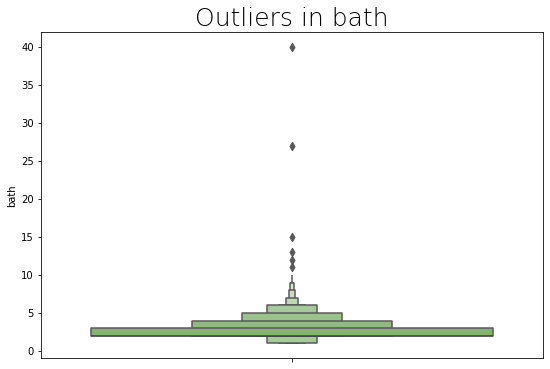

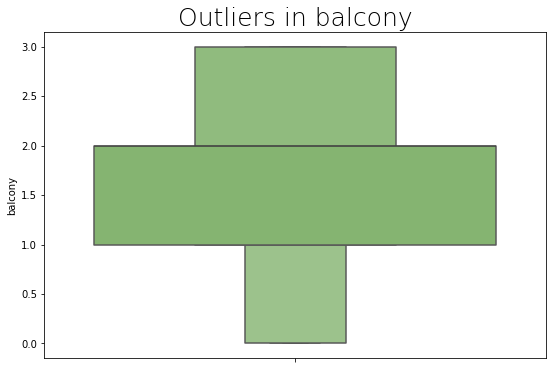

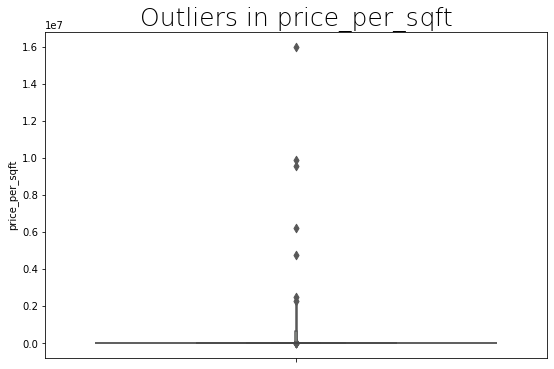

In [133]:
for col in ["total_sqft", "bath", "balcony", "price_per_sqft"]:
    plt.figure(figsize=(9,6));
    sns.boxenplot(y=col,data=df,palette='summer');
    plt.title(f'Outliers in {col}',fontsize=25,fontweight=5);
    plt.show()

#### As we can see there are outliers present in total_sqft, bath and price_per_sqft which must be removed.

In [134]:
print(np.where((df["total_sqft"]<100) | (df['total_sqft']>5000)))

(array([   55,   333,   390,   392,   419,   492,   501,   577,   641,
         706,   771,   967,   968,  1030,  1062,  1093,  1173,  1634,
        1794,  1921,  2002,  2489,  2682,  2740,  2880,  2984,  2995,
        3008,  3023,  4021,  4084,  4555,  4714,  4723,  5121,  5179,
        5194,  5382,  5671,  5677,  5990,  6018,  6022,  6223,  6499,
        6681,  6736,  6758,  6805,  6884,  6954,  6973,  7231,  7344,
        7379,  7439,  7469,  7507,  7761,  7783,  7829,  8119,  8209,
        8245,  8302,  8513,  8730,  8782,  8786,  8890,  8963,  8978,
        9132,  9264,  9331,  9396,  9410,  9456,  9585,  9593,  9816,
        9936,  9993,  9996, 10240, 10558, 10617, 10788, 10903, 11015,
       11032, 11068, 11214, 11306, 11358, 11437, 11673, 11695, 11791,
       11804, 11903, 11998, 12111, 12396, 12498, 12522, 12600, 12624],
      dtype=int64),)


In [135]:
House with size less than 100 and more than 5000 square feet is impractical. Thus, such outliers will be removed.

SyntaxError: invalid syntax (<ipython-input-135-e50d9ed8e07e>, line 1)

In [ ]:
df = df[(df["total_sqft"] >= 100) | (df["total_sqft"] <= 5000)]

#### Houses with more than 10 bathrooms are acting as outliers.

In [136]:
print(np.where(df["bath"]<10))


(array([    0,     1,     2, ..., 12707, 12708, 12709], dtype=int64),)


In [137]:
df = df[(df["bath"] <= 10)]

In [138]:
print(np.where((df["price_per_sqft"]<1000) | (df['price_per_sqft']>50000)))

(array([  333,   392,   641,   771,   967,   968,  1030,  1062,  1656,
        1792,  3120,  4718,  5116,  5174,  5253,  5342,  5377,  5416,
        5666,  5672,  5985,  6013,  6098,  6218,  6604,  6737,  6879,
        6968,  7226,  7274,  7339,  7491,  7857,  8781,  8958,  9987,
       10782, 11009, 11062, 11194, 11689, 11897, 11983], dtype=int64),)


#### Houses with price more than 50,000 per square feet are acting as outliers.

In [139]:
df = df[(df["price_per_sqft"]>=1000) | (df['price_per_sqft']<=50000)]

In [140]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12560 entries, 0 to 12709
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       12560 non-null  object 
 1   location        12560 non-null  object 
 2   size            12560 non-null  object 
 3   total_sqft      12560 non-null  float64
 4   bath            12560 non-null  float64
 5   balcony         12560 non-null  float64
 6   price           12560 non-null  float64
 7   price_per_sqft  12560 non-null  float64
dtypes: float64(5), object(3)
memory usage: 883.1+ KB


### Label Encoding

In [141]:
from sklearn.preprocessing import LabelEncoder

In [142]:
encoder = LabelEncoder()
df['area_type'] = encoder.fit_transform(df['area_type'])
df['location'] = encoder.fit_transform(df['location'])
df['size'] = encoder.fit_transform(df['size'])

In [143]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,3,403,5,1056.0,2.0,1.0,39.07,3699.810606
1,2,302,7,2600.0,5.0,3.0,120.00,4615.384615
2,0,1137,6,1440.0,2.0,3.0,62.00,4305.555556
3,3,734,6,1521.0,3.0,1.0,95.00,6245.890861
4,3,693,5,1200.0,2.0,1.0,51.00,4250.000000


#### Corelation of Price with different features

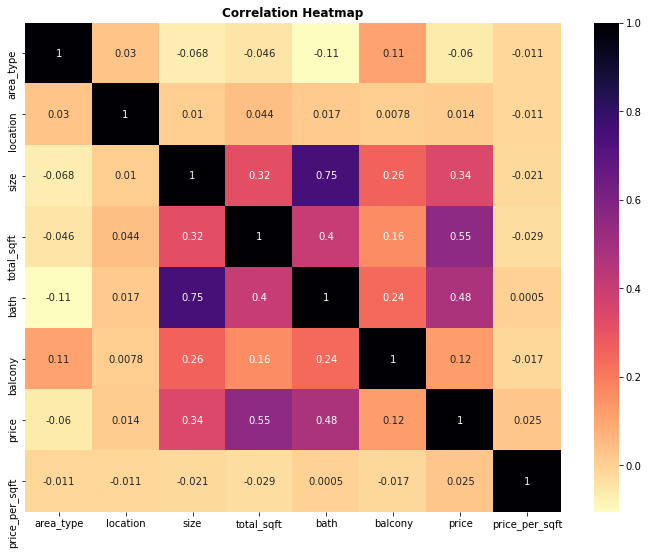

In [144]:
plt.figure(figsize = (12,9))
sns.heatmap(df.corr(), annot = True, cmap = "magma_r")
plt.title("Correlation Heatmap",fontdict = {"fontweight":"bold"})
plt.show()

#### area_type and location has very little correlation with price. So, these features can be removed.

In [145]:
x = df.drop(["price", "area_type", "location"], axis = 1)

In [146]:
y = df["price"]

In [147]:
x = x.values
y = y.values

### Test Train Split

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

#### Applying Linear Model Regression

In [150]:
from sklearn import linear_model

In [151]:
model = linear_model.LinearRegression()

In [152]:
model.fit(x_train, y_train)

LinearRegression()

In [153]:
y_pred = model.predict(x_test)

In [154]:
from sklearn.metrics import r2_score

In [155]:
r2_score = model.score(x_test,y_test)

In [156]:
print(r2_score*100,'%')

12.505225458250324 %


#### Applying Random Forest Regressor

In [331]:
from sklearn.ensemble import RandomForestRegressor

In [332]:
model=RandomForestRegressor(n_estimators=10, verbose=4)

In [333]:
model.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


RandomForestRegressor(n_estimators=10, verbose=4)

In [334]:
y_pred = model.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [335]:
r2_score = model.score(x_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [336]:
print(r2_score*100,'%')

98.05576728090514 %



#### Applying decision Tree Regressor

In [217]:
from sklearn.tree import DecisionTreeRegressor


In [218]:
model = DecisionTreeRegressor()


In [219]:
model.fit(x_train, y_train)


DecisionTreeRegressor()

In [220]:
y_pred = model.predict(x_test)


In [221]:
r2_score = model.score(x_test,y_test)


In [222]:
print(r2_score*100,'%')

97.46006602677895 %


#### Applying KNeighors Regressor

In [223]:
from sklearn.neighbors import KNeighborsRegressor


In [224]:
model = KNeighborsRegressor(n_neighbors=10)

In [225]:
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [226]:
y_pred = model.predict(x_test)

In [227]:
r2_score = model.score(x_test,y_test)

In [228]:
print(r2_score*100,'%')

85.33842108477545 %


#### Random Forest Regressor has shown highest accuracy, followed by Decision Tree and KNeighbors Regressor. Linear Regressor has shown lowest accuracy.